In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from scipy import stats

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# df is the merged dataset (train + test)
df = pd.concat((train, test)).reset_index(drop=True)

/Users/chloeymoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [96]:
df = df.fillna("NaN")

In [97]:
cat = df.select_dtypes(include=['object']).astype(str)

In [98]:
cat_col = df.select_dtypes(include=['object']).columns

In [99]:
cat_col

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 'Functional',
       'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual',
       'GarageType', 'GarageYrBlt', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotFrontage',
       'LotShape', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SalePrice', 'SaleType', 'Street', 'TotalBsmtSF',
       'Utilities'],
      dtype='object')

In [100]:
cat.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,...,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,Street,TotalBsmtSF,Utilities
0,NaN,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,...,Y,NaN,CompShg,Gable,Normal,208500.0,WD,Pave,856.0,AllPub
1,NaN,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,...,Y,NaN,CompShg,Gable,Normal,181500.0,WD,Pave,1262.0,AllPub
2,NaN,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,...,Y,NaN,CompShg,Gable,Normal,223500.0,WD,Pave,920.0,AllPub
3,NaN,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,...,Y,NaN,CompShg,Gable,Abnorml,140000.0,WD,Pave,756.0,AllPub
4,NaN,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,...,Y,NaN,CompShg,Gable,Normal,250000.0,WD,Pave,1145.0,AllPub


In [103]:
from sklearn import preprocessing

encoded = cat.apply(lambda series: pd.Series(
    preprocessing.LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))
print(encoded)

      Alley  BldgType  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  \
0         1         0         4             4         761           0   
1         1         0         4             1         977           0   
2         1         0         4             2         565           0   
3         1         0         1             4         332           0   
4         1         0         4             0         716           0   
5         1         0         4             4         783           0   
6         1         0         4             0         199           0   
7         1         0         4             2         890         106   
8         1         0         4             4           0           0   
9         1         1         4             4         885           0   
10        1         0         4             4         924           0   
11        1         0         4             4         990           0   
12        1         0         4             4      

In [94]:
# from sklearn import preprocessing
# cat_encoded = cat.apply(preprocessing.LabelEncoder().fit_transform)

TypeError: LabelEncoder() takes no arguments

In [91]:
cat_encoded.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,...,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,Street,TotalBsmtSF,Utilities
0,1,0,4,4,761,0,2,6,1,0,...,2,3,1,1,4,343,9,1,942,0
1,1,0,4,1,977,0,0,6,0,1,...,2,3,1,1,4,270,9,1,228,0
2,1,0,4,2,565,0,2,6,1,0,...,2,3,1,1,4,373,9,1,988,0
3,1,0,1,4,332,0,0,6,1,0,...,2,3,1,1,0,125,9,1,862,0
4,1,0,4,0,716,0,2,6,1,0,...,2,3,1,1,4,425,9,1,129,0


In [64]:
df_encoded = pd.concat([df.select_dtypes(exclude=['object']),cat_encoded],axis=1)

In [65]:
df_encoded.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,KitchenAbvGr,...,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,Street,TotalBsmtSF,Utilities
0,856,854,0,3,0,0,2,1710,1,1,...,2,3,1,1,4,343,9,1,942,0
1,1262,0,0,3,0,1,2,1262,0,1,...,2,3,1,1,4,270,9,1,228,0
2,920,866,0,3,0,1,2,1786,1,1,...,2,3,1,1,4,373,9,1,988,0
3,961,756,0,3,272,1,1,1717,0,1,...,2,3,1,1,0,125,9,1,862,0
4,1145,1053,0,4,0,1,2,2198,1,1,...,2,3,1,1,4,425,9,1,129,0


In [68]:
def computeMissingness(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    # df.boxplot(column='LotFrontage',by='Neighborhood')
    # plt.scatter(x=df.LotArea,y=df.LotFrontage)
    return missing_data

In [93]:
computeMissingness(df_encoded)

,Total,Percent
Utilities,0,0.0
TotalBsmtSF,0,0.0
WoodDeckSF,0,0.0
YearBuilt,0,0.0
YearRemodAdd,0,0.0
YrSold,0,0.0
Alley,0,0.0
BldgType,0,0.0
BsmtCond,0,0.0
BsmtExposure,0,0.0


(array([619.,   0., 692.,   0.,   0., 622.,   0., 647.,   0., 339.]),
 array([2006. , 2006.4, 2006.8, 2007.2, 2007.6, 2008. , 2008.4, 2008.8,
        2009.2, 2009.6, 2010. ]),
 <a list of 10 Patch objects>)

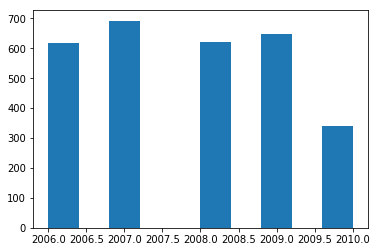

In [88]:
plt.hist(df_encoded.YrSold)

In [ ]:
df_

In [85]:
from missingpy import MissForest
imputer = MissForest()
#df = df[["SaleType","SalePrice"]]#df.drop('SalePrice', axis=1)
#df_encoded.isnull().fillna("")
imputer = MissForest()  #copy=True,missing_values=[None,"nan"]
df_imputed = imputer.fit(df_encoded,cat_vars=[df_encoded.columns.get_loc(x) for x in cat_col]) #[df.columns.get_loc(x) for x in cat]
df_imputed = imputer.transform(df_encoded)
df_imputed = pd.DataFrame(data=df_imputed, columns=df.columns)

/Users/chloeymoon/anaconda3/lib/python3.7/site-packages/missingpy/missforest.py:528: UserWarning: No missing value located; returning original dataset.
  warnings.warn("No missing value located; returning original "


In [86]:
df_imputed

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3.0,0.0,0.0,2.0,1710.0,1.0,1.0,...,2.0,3.0,1.0,1.0,4.0,343.0,9.0,1.0,942.0,0.0
1,1262.0,0.0,0.0,3.0,0.0,1.0,2.0,1262.0,0.0,1.0,...,2.0,3.0,1.0,1.0,4.0,270.0,9.0,1.0,228.0,0.0
2,920.0,866.0,0.0,3.0,0.0,1.0,2.0,1786.0,1.0,1.0,...,2.0,3.0,1.0,1.0,4.0,373.0,9.0,1.0,988.0,0.0
3,961.0,756.0,0.0,3.0,272.0,1.0,1.0,1717.0,0.0,1.0,...,2.0,3.0,1.0,1.0,0.0,125.0,9.0,1.0,862.0,0.0
4,1145.0,1053.0,0.0,4.0,0.0,1.0,2.0,2198.0,1.0,1.0,...,2.0,3.0,1.0,1.0,4.0,425.0,9.0,1.0,129.0,0.0
5,796.0,566.0,320.0,1.0,0.0,0.0,1.0,1362.0,1.0,1.0,...,2.0,3.0,1.0,1.0,4.0,134.0,9.0,1.0,890.0,0.0
6,1694.0,0.0,0.0,3.0,0.0,1.0,2.0,1694.0,0.0,1.0,...,2.0,3.0,1.0,1.0,4.0,504.0,9.0,1.0,524.0,0.0
7,1107.0,983.0,0.0,3.0,228.0,2.0,2.0,2090.0,1.0,1.0,...,2.0,3.0,1.0,1.0,4.0,321.0,9.0,1.0,99.0,0.0
8,1022.0,752.0,0.0,2.0,205.0,2.0,2.0,1774.0,0.0,2.0,...,2.0,3.0,1.0,1.0,0.0,82.0,9.0,1.0,1015.0,0.0
9,1077.0,0.0,0.0,2.0,0.0,2.0,1.0,1077.0,0.0,2.0,...,2.0,3.0,1.0,1.0,4.0,44.0,9.0,1.0,1050.0,0.0


(array([2.916e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

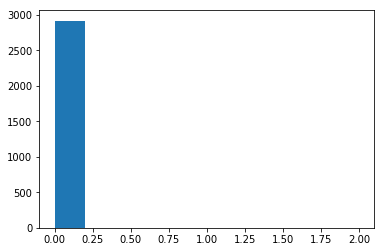

In [87]:
plt.hist(df_imputed.YrSold)